<a href="https://colab.research.google.com/github/fawazdhianabil/Project/blob/main/Holdout%2C_k_fold%2C_Leave_one_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score, LeaveOneOut
from sklearn.metrics import accuracy_score

#**Membuat dan Memilih Variabel X,y**

In [23]:
iris = load_iris()
X = iris.data
y = iris.target

In [24]:
X.shape

(150, 4)

In [29]:
y.shape

(150,)

#**Holdout**

Holdout validation adalah ketika kita membagi data menjadi data latih dan data uji dengan proporsi yang dapat kita tentukan sendiri, seperti data latih sebanyak 80% dan data uji 20% atau data latih 65% dan data uji 35%. Kekurangan dari metode ini adalah semua data tidak mendapat bagian untuk menjadi data latih atau data uji. [[1]](https://medium.com/@eijaz/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [26]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9666666666666667

#**K-fold Cross Validation**

K-fold Cross Validation adalah metode yang membagi data sebanyak k-grup. Misal dipilih k = 5, maka 4 grup data akan dipilih sebagai data latih dan 1 grup data sebagai data validasi atau data uji. Semua proses akan dijalani sampai semua data mendapatkan bagian sebagai data latih dan data uji, jika dipilih k = 5 maka proses akan diulangi sebanyak 5 kali [[1]](https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a) [[2]](https://medium.com/@eijaz/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f)

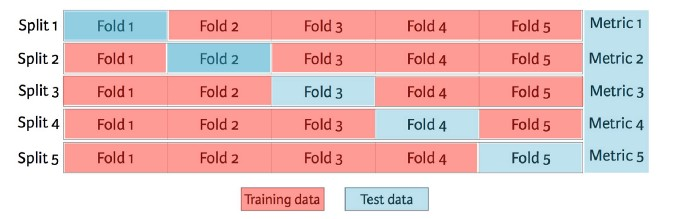

In [27]:
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X, y, cv=4, scoring='accuracy')
print('error pada masing-masing data testing :')
print(scores)
print('rata-rata error pada masing-masing data testing',scores.mean())

error pada masing-masing data testing :
[0.97368421 0.94736842 0.94594595 1.        ]
rata-rata error pada masing-masing data testing 0.9667496443812233


#**Leave-one-out cross validation**

Leave-one-out Cross Validation membagi data latih dan data uji dengan menggunakan semua data menjadi k-grup atau k = N, dimana N adalah jumlah data. Sehingga data akan dibagi dan diproses sebanyak N. Berdasarkan hal tersebut, LOOCV sangat tidak cocok untuk data besar. [[1]](https://www.researchgate.net/publication/332425167_Monitoring_the_level_of_hypnosis_using_a_hierarchical_SVM_system/download), [[2]](https://www.cs.cmu.edu/~schneide/tut5/node42.html)

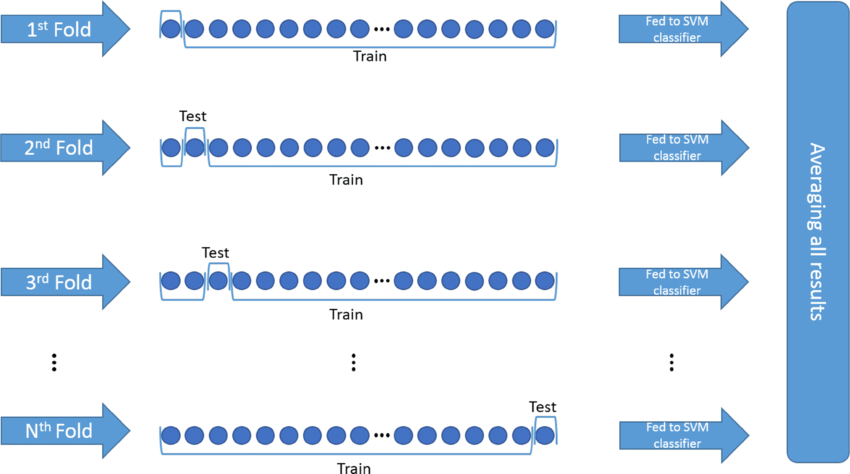

In [28]:
knn = KNeighborsClassifier(n_neighbors = 5)
le = LeaveOneOut()
skor = cross_val_score(knn, X, y, cv=le, scoring='accuracy')
print('error pada masing-masing data testing :')
print(skor)
print(' rata-rata error pada masing-masing data testing',skor.mean())

error pada masing-masing data testing :
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
 rata-rata error pada masing-masing data testing 0.9666666666666667


Ketiga metode dapat membagi data dengan baik dengan karakteristiknya masing-masing.

1. Holdout Validation membagi data sebanyak persen yang telah kita tentukan, tetapi dapat menyebabkan bias karena semua data tidak dapat secara bergantian menjadi data latih dan data uji.

2. k-fold Cross Validation membagi data sebanyak k dan memproses sebanyak k, tetapi kita harus memilih k optimal untuk menghasilkan akurasi terbaik.

3. Leave-One-Out Cross Validation adalah versi lain dari k-fold, dimana jumlah k = N, dan N adalah banyak data pada dataset. Kekurangannya adalah LOOCV tidak direkomendasikan pada data yang besar karena dapat menyebabkan waktu komputasi yang lama.

Ketiga metode menunjukkan akurasi yang sama, hal itu dapat disebabkan karena data memiliki jumlah yang terlalu sedikit sehingga menyebabkan terjadinya overfitting atau model dilatih terlalu baik.